**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import io
import pickle

**Read the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving chronickidneydisease.csv to chronickidneydisease.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['chronickidneydisease.csv']))
data.head()
data.tail()
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
data.drop(["id"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

**Understanding Data Type And Summary Of Features**

In [ ]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [ ]:
for col in data:
    unique=data[col].value_counts()
    print(unique,"\n========================= \n")

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64 

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64 

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64 

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64 

0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64 

normal      201
abnormal     47
Name: rbc, dtype: int64 

normal      259
abnormal     76
Name: pc, dtype: int64 

notpresent    354
present        42
Name: pcc, dtype: int64 

notpresent    374
present        22
Name: ba, dtype: int64 

99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: bgr, Length: 146, dtype: int64 

46.0 

**Cleaning The Dataset**

In [ ]:
data['pcv']=data['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

data['wc']=data['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

data['rc']=data['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

data['dm']=data['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

data['cad']=data['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

data['classification']=data['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))

In [ ]:
mistyped=[['pcv','rc','wc']]
for i in mistyped:
    data[i]=data[i].astype('float')

In [ ]:
cat_cols=list(data.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
num_cols=list(data.select_dtypes(['int64','float64']))
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

**Handling The Missing Values**

In [ ]:
data.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
for col in num_cols:
    data[col]=data[col].fillna(data[col].median())

In [ ]:
data['rbc'].fillna('normal',inplace=True)
data['pc'].fillna('normal',inplace=True)
data['pcc'].fillna('notpresent',inplace=True)
data['ba'].fillna('notpresent',inplace=True)
data['htn'].fillna('no',inplace=True)
data['dm'].fillna('no',inplace=True)
data['cad'].fillna('no',inplace=True)
data['appet'].fillna('good',inplace=True)
data['pe'].fillna('no',inplace=True)
data['ane'].fillna('no',inplace=True)

In [ ]:
data.isna().sum().sort_values(ascending=False)

age               0
pot               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
sod               0
bp                0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
classification    0
dtype: int64

**Replacing The Missing Values**

In [ ]:
data['classification']=data['classification'].map({'ckd':1,'notckd':0})

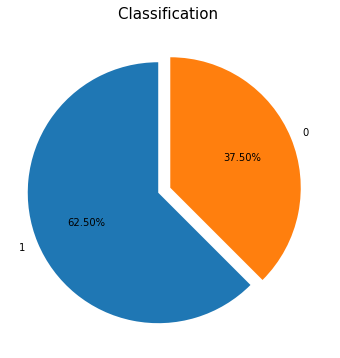

In [ ]:
attr_count=data['classification'].value_counts()
attr_label=data['classification'].value_counts().index

fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr_count,explode=(0.1,0),labels=attr_label,autopct='%.2f%%',startangle=90)
ax.set_title("Classification ",fontsize=15)
plt.show()

Numerical Relationship

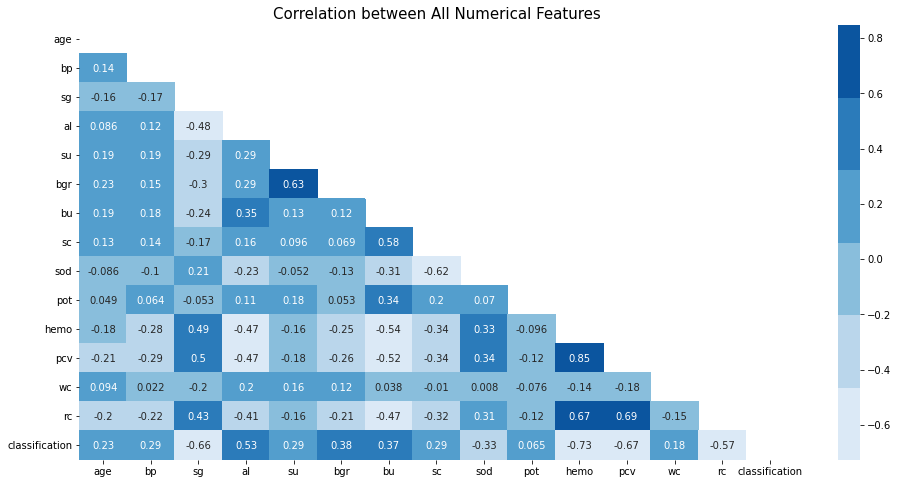

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Features',size=15)

mask=np.triu(np.ones_like(data.corr()))

colormap=sns.color_palette('Blues')
sns.heatmap(data.corr(),annot=True,cmap=colormap,mask=mask)
plt.show()

**Label Encoding**

In [ ]:
data['rbc']=data['rbc'].map({'normal':0,'abnormal':1})
data['pc']=data['pc'].map({'normal':0,'abnormal':1})
data['pcc']=data['pcc'].map({'notpresent':0,'present':1})
data['ba']=data['ba'].map({'notpresent':0,'present':1})
data['htn']=data['htn'].map({'no':0,'yes':1})
data['dm']=data['dm'].map({'no':0,'yes':1})
data['cad']=data['cad'].map({'no':0,'yes':1})
data['pe']=data['pe'].map({'no':0,'yes':1})
data['ane']=data['ane'].map({'no':0,'yes':1})
data['appet']=data['appet'].map({'good':0,'poor':1})

**Splitting The Dataset Into Dependent And Indpendent Variable**

In [ ]:
y = data["appet"]
X = data.drop("appet",axis=1)

In [ ]:
y

0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: appet, Length: 400, dtype: int64

In [ ]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [ ]:
y = data["wc"]
X = data.drop("wc",axis=1)

In [ ]:
y

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: wc, Length: 400, dtype: float64

In [ ]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,11.3,38.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,15.7,47.0,4.9,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,16.5,54.0,6.2,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,15.8,49.0,5.4,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,14.2,51.0,5.9,0,0,0,0,0,0,0


In [ ]:
y = data["bp"]
X = data.drop("bp",axis=1)

In [ ]:
y

0      80.0
1      50.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: bp, Length: 400, dtype: float64

In [ ]:
X

,age,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,1.020,4.0,0.0,0,0,0,0,121.0,18.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,42.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,12.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,17.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


**Testing The Model**

In [ ]:
x=data.drop('classification',axis=1)
y=data['classification']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train size {} , X_test size {}".format(X_train.shape,X_test.shape))

X_train size (320, 24) , X_test size (80, 24)


In [39]:
score=cross_val_score(RandomForestClassifier(max_depth=15,n_estimators=5),X_train,y_train,cv=10)
print("Average Accuracy Score {}".format(score.mean()))

Average Accuracy Score 0.9875


In [40]:
rf=RandomForestClassifier(max_depth=5,n_estimators=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)